Test notebook

In [34]:
# Dependencies and Setup
import missingno as msno
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import sys
import json
import requests

# Load the data file, read and display it with Pandas
q037_data = Path("Q037.csv")

# Read and store into Pandas DataFrames
q037_df = pd.read_csv(q037_data)
q037_df.head()

C:\Users\Hailey\AppData\Local\Temp\ipykernel_42664\3339273294.py:19: DtypeWarning: Columns (17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  q037_df = pd.read_csv(q037_data)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),35 - 44,AGEYR,AGEYR3544
1,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),65 or older,AGEYR,AGEYR65PLUS
2,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),18 - 24,AGEYR,AGEYR1824
3,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),55 - 64,AGEYR,AGEYR5564
4,2021,2021,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,VALUE,12,Age (years),25 - 34,AGEYR,AGEYR2534


In [35]:
q037_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [36]:
# Get the overall data for Q037 for year of 2022
# Select specific columns by name
# selected_columns = ["YearStart", "LocationAbbr", "Data_Value", "StratificationCategoryId1", "Stratification1"]
# q037_fivecols = q037_df.loc[q037_df["StratificationCategoryId1"] == "OVR", selected_columns]
# q037_fivecols.to_csv("q037_2022_overall.csv", index=False)

# Trim the columns of data to the one we need
q037_fivecols = q037_df.drop(['YearEnd','Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'StratificationID1'], axis=1)
q037_fivecols.to_csv("q037_fivecols.csv", index=False)

In [37]:
# Trim the columns of data to the one we need
q037_df_trim = q037_df.drop(['Datasource','Class', 'Topic','Data_Value_Unit', 'Data_Value_Type','Data_Value_Alt','Data_Value_Footnote_Symbol','Data_Value_Footnote','Total', 'DataValueTypeID'], axis=1)
q037_df_trim

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2021,2021,FL,Florida,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,35 - 44,...,NaN,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,12,Age (years),35 - 44,AGEYR,AGEYR3544
1,2021,2021,FL,Florida,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,65 or older,...,NaN,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,12,Age (years),65 or older,AGEYR,AGEYR65PLUS
2,2021,2021,FL,Florida,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,18 - 24,...,NaN,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,12,Age (years),18 - 24,AGEYR,AGEYR1824
3,2021,2021,FL,Florida,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,55 - 64,...,NaN,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,12,Age (years),55 - 64,AGEYR,AGEYR5564
4,2021,2021,FL,Florida,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,25 - 34,...,NaN,"(28.932040377000476, -81.92896053899966)",OWS,OWS1,Q037,12,Age (years),25 - 34,AGEYR,AGEYR2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18112,2021,2021,WY,Wyoming,Percent of adults aged 18 years and older who ...,36.6,34.3,38.9,3555.0,NaN,...,Non-Hispanic White,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,56,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
18113,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,29.2,17.8,44.0,58.0,NaN,...,American Indian/Alaska Native,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
18114,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,26.5,19.9,34.3,200.0,NaN,...,Hispanic,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,56,Race/Ethnicity,Hispanic,RACE,RACEHIS
18115,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,36.9,34.9,38.9,3356.0,NaN,...,Non-Hispanic White,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,56,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT


In [38]:
# Remove the names of the territories
q037_df_trim_filtered = q037_df_trim[~q037_df_trim['LocationDesc'].str.contains('Guam|Virgin Islands|Puerto Rico')]

#remove NA Data value
q037_df_trim_cleaned = q037_df_trim_filtered.dropna(subset=['Data_Value'])
q037_df_trim_cleaned

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
18,2016,2016,AL,Alabama,Percent of adults aged 18 years and older who ...,35.3,32.2,38.5,1402.0,55 - 64,...,NaN,"(32.840571122, -86.631860762)",OWS,OWS1,Q037,1,Age (years),55 - 64,AGEYR,AGEYR5564
19,2018,2018,AL,Alabama,Percent of adults aged 18 years and older who ...,31.9,28.0,36.1,719.0,35 - 44,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,1,Age (years),35 - 44,AGEYR,AGEYR3544
20,2018,2018,AL,Alabama,Percent of adults aged 18 years and older who ...,30.4,25.9,35.3,562.0,25 - 34,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,1,Age (years),25 - 34,AGEYR,AGEYR2534
21,2018,2018,AL,Alabama,Percent of adults aged 18 years and older who ...,38.6,36.1,41.1,2251.0,65 or older,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,1,Age (years),65 or older,AGEYR,AGEYR65PLUS
22,2018,2018,AL,Alabama,Percent of adults aged 18 years and older who ...,35.6,32.1,39.3,969.0,45 - 54,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,1,Age (years),45 - 54,AGEYR,AGEYR4554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18111,2021,2021,WY,Wyoming,Percent of adults aged 18 years and older who ...,51.4,34.6,67.9,54.0,NaN,...,2 or more races,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,56,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
18112,2021,2021,WY,Wyoming,Percent of adults aged 18 years and older who ...,36.6,34.3,38.9,3555.0,NaN,...,Non-Hispanic White,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,56,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
18113,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,29.2,17.8,44.0,58.0,NaN,...,American Indian/Alaska Native,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
18114,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,26.5,19.9,34.3,200.0,NaN,...,Hispanic,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,56,Race/Ethnicity,Hispanic,RACE,RACEHIS


In [39]:
#filter only National data
q037_natl_df = q037_df_trim_cleaned[q037_df_trim_cleaned['LocationDesc'].str.contains('National')].sort_values(by=['YearStart', 'Stratification1'])
q037_natl_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
10125,2011,2011,US,National,Percent of adults aged 18 years and older who ...,34.5,33.8,35.2,74022.0,NaN,...,NaN,NaN,OWS,OWS1,Q037,59,Income,"$15,000 - $24,999",INC,INC1525
10112,2011,2011,US,National,Percent of adults aged 18 years and older who ...,35.5,34.6,36.4,48923.0,NaN,...,NaN,NaN,OWS,OWS1,Q037,59,Income,"$25,000 - $34,999",INC,INC2535
10155,2011,2011,US,National,Percent of adults aged 18 years and older who ...,37.1,36.3,37.9,61329.0,NaN,...,NaN,NaN,OWS,OWS1,Q037,59,Income,"$35,000 - $49,999",INC,INC3550
10139,2011,2011,US,National,Percent of adults aged 18 years and older who ...,37.5,36.8,38.3,64664.0,NaN,...,NaN,NaN,OWS,OWS1,Q037,59,Income,"$50,000 - $74,999",INC,INC5075
10149,2011,2011,US,National,Percent of adults aged 18 years and older who ...,38.3,37.8,38.9,110079.0,NaN,...,NaN,NaN,OWS,OWS1,Q037,59,Income,"$75,000 or greater",INC,INC75PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,2022,2022,US,National,Percent of adults aged 18 years and older who ...,38.9,38.5,39.4,189865.0,NaN,...,NaN,NaN,OWS,OWS1,Q037,59,Gender,Male,GEN,MALE
16491,2022,2022,US,National,Percent of adults aged 18 years and older who ...,31.6,30.6,32.6,29914.0,NaN,...,Non-Hispanic Black,NaN,OWS,OWS1,Q037,59,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK
16555,2022,2022,US,National,Percent of adults aged 18 years and older who ...,34.5,34.2,34.8,289595.0,NaN,...,Non-Hispanic White,NaN,OWS,OWS1,Q037,59,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
5269,2022,2022,US,National,Percent of adults aged 18 years and older who ...,33.6,33.0,34.2,105991.0,NaN,...,NaN,NaN,OWS,OWS1,Q037,59,Education,Some college or technical school,EDU,EDUCOTEC


In [40]:
q037_df_sorted = q037_df_trim_cleaned.sort_values(by=['YearStart', 'StratificationCategory1', 'Stratification1', 'LocationDesc'])
q037_df_sorted

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
57,2011,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,27.1,21.6,33.3,356.0,18 - 24,...,NaN,"(32.840571122, -86.631860762)",OWS,OWS1,Q037,1,Age (years),18 - 24,AGEYR,AGEYR1824
124,2011,2011,AK,Alaska,Percent of adults aged 18 years and older who ...,32.0,24.7,40.4,212.0,18 - 24,...,NaN,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,2,Age (years),18 - 24,AGEYR,AGEYR1824
216,2011,2011,AZ,Arizona,Percent of adults aged 18 years and older who ...,27.7,20.7,36.1,212.0,18 - 24,...,NaN,"(34.86597028, -111.763811277)",OWS,OWS1,Q037,4,Age (years),18 - 24,AGEYR,AGEYR1824
252,2011,2011,AR,Arkansas,Percent of adults aged 18 years and older who ...,27.3,19.6,36.7,136.0,18 - 24,...,NaN,"(34.748650124, -92.274490743)",OWS,OWS1,Q037,5,Age (years),18 - 24,AGEYR,AGEYR1824
347,2011,2011,CA,California,Percent of adults aged 18 years and older who ...,26.8,23.6,30.3,902.0,18 - 24,...,NaN,"(37.638640123, -120.999999538)",OWS,OWS1,Q037,6,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12891,2022,2022,VA,Virginia,Percent of adults aged 18 years and older who ...,32.1,30.8,33.5,9378.0,NaN,...,NaN,"(37.54268067400045, -78.45789046299967)",OWS,OWS1,Q037,51,Total,Total,OVR,OVERALL
12903,2022,2022,WA,Washington,Percent of adults aged 18 years and older who ...,34.6,33.7,35.4,22869.0,NaN,...,NaN,"(47.52227862900048, -120.47001078999972)",OWS,OWS1,Q037,53,Total,Total,OVR,OVERALL
12915,2022,2022,WV,West Virginia,Percent of adults aged 18 years and older who ...,33.4,31.7,35.1,4640.0,NaN,...,NaN,"(38.66551020200046, -80.71264013499967)",OWS,OWS1,Q037,54,Total,Total,OVR,OVERALL
12927,2022,2022,WI,Wisconsin,Percent of adults aged 18 years and older who ...,33.0,31.7,34.2,10080.0,NaN,...,NaN,"(44.39319117400049, -89.81637074199966)",OWS,OWS1,Q037,55,Total,Total,OVR,OVERALL


# Visualizations focus on a specific year, i.e., 2022

In [41]:
q037_2022 = q037_df_sorted.loc[q037_df_sorted["YearStart"] == 2022]
q037_2022

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
85,2022,2022,AL,Alabama,Percent of adults aged 18 years and older who ...,31.0,23.5,39.7,182.0,18 - 24,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,1,Age (years),18 - 24,AGEYR,AGEYR1824
156,2022,2022,AK,Alaska,Percent of adults aged 18 years and older who ...,27.7,22.5,33.5,324.0,18 - 24,...,NaN,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q037,2,Age (years),18 - 24,AGEYR,AGEYR1824
233,2022,2022,AZ,Arizona,Percent of adults aged 18 years and older who ...,22.7,18.1,28.1,481.0,18 - 24,...,NaN,"(34.865970280000454, -111.76381127699972)",OWS,OWS1,Q037,4,Age (years),18 - 24,AGEYR,AGEYR1824
301,2022,2022,AR,Arkansas,Percent of adults aged 18 years and older who ...,24.8,18.8,31.8,219.0,18 - 24,...,NaN,"(34.74865012400045, -92.27449074299966)",OWS,OWS1,Q037,5,Age (years),18 - 24,AGEYR,AGEYR1824
376,2022,2022,CA,California,Percent of adults aged 18 years and older who ...,25.4,21.9,29.2,869.0,18 - 24,...,NaN,"(37.63864012300047, -120.99999953799971)",OWS,OWS1,Q037,6,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12891,2022,2022,VA,Virginia,Percent of adults aged 18 years and older who ...,32.1,30.8,33.5,9378.0,NaN,...,NaN,"(37.54268067400045, -78.45789046299967)",OWS,OWS1,Q037,51,Total,Total,OVR,OVERALL
12903,2022,2022,WA,Washington,Percent of adults aged 18 years and older who ...,34.6,33.7,35.4,22869.0,NaN,...,NaN,"(47.52227862900048, -120.47001078999972)",OWS,OWS1,Q037,53,Total,Total,OVR,OVERALL
12915,2022,2022,WV,West Virginia,Percent of adults aged 18 years and older who ...,33.4,31.7,35.1,4640.0,NaN,...,NaN,"(38.66551020200046, -80.71264013499967)",OWS,OWS1,Q037,54,Total,Total,OVR,OVERALL
12927,2022,2022,WI,Wisconsin,Percent of adults aged 18 years and older who ...,33.0,31.7,34.2,10080.0,NaN,...,NaN,"(44.39319117400049, -89.81637074199966)",OWS,OWS1,Q037,55,Total,Total,OVR,OVERALL


In [42]:
# Output the
q037_2022_states_age = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "AGEYR"]
q037_2022_states_age.to_csv("q037_2022_states_age.csv", index=False)

C:\Users\Hailey\anaconda3\envs\dev\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


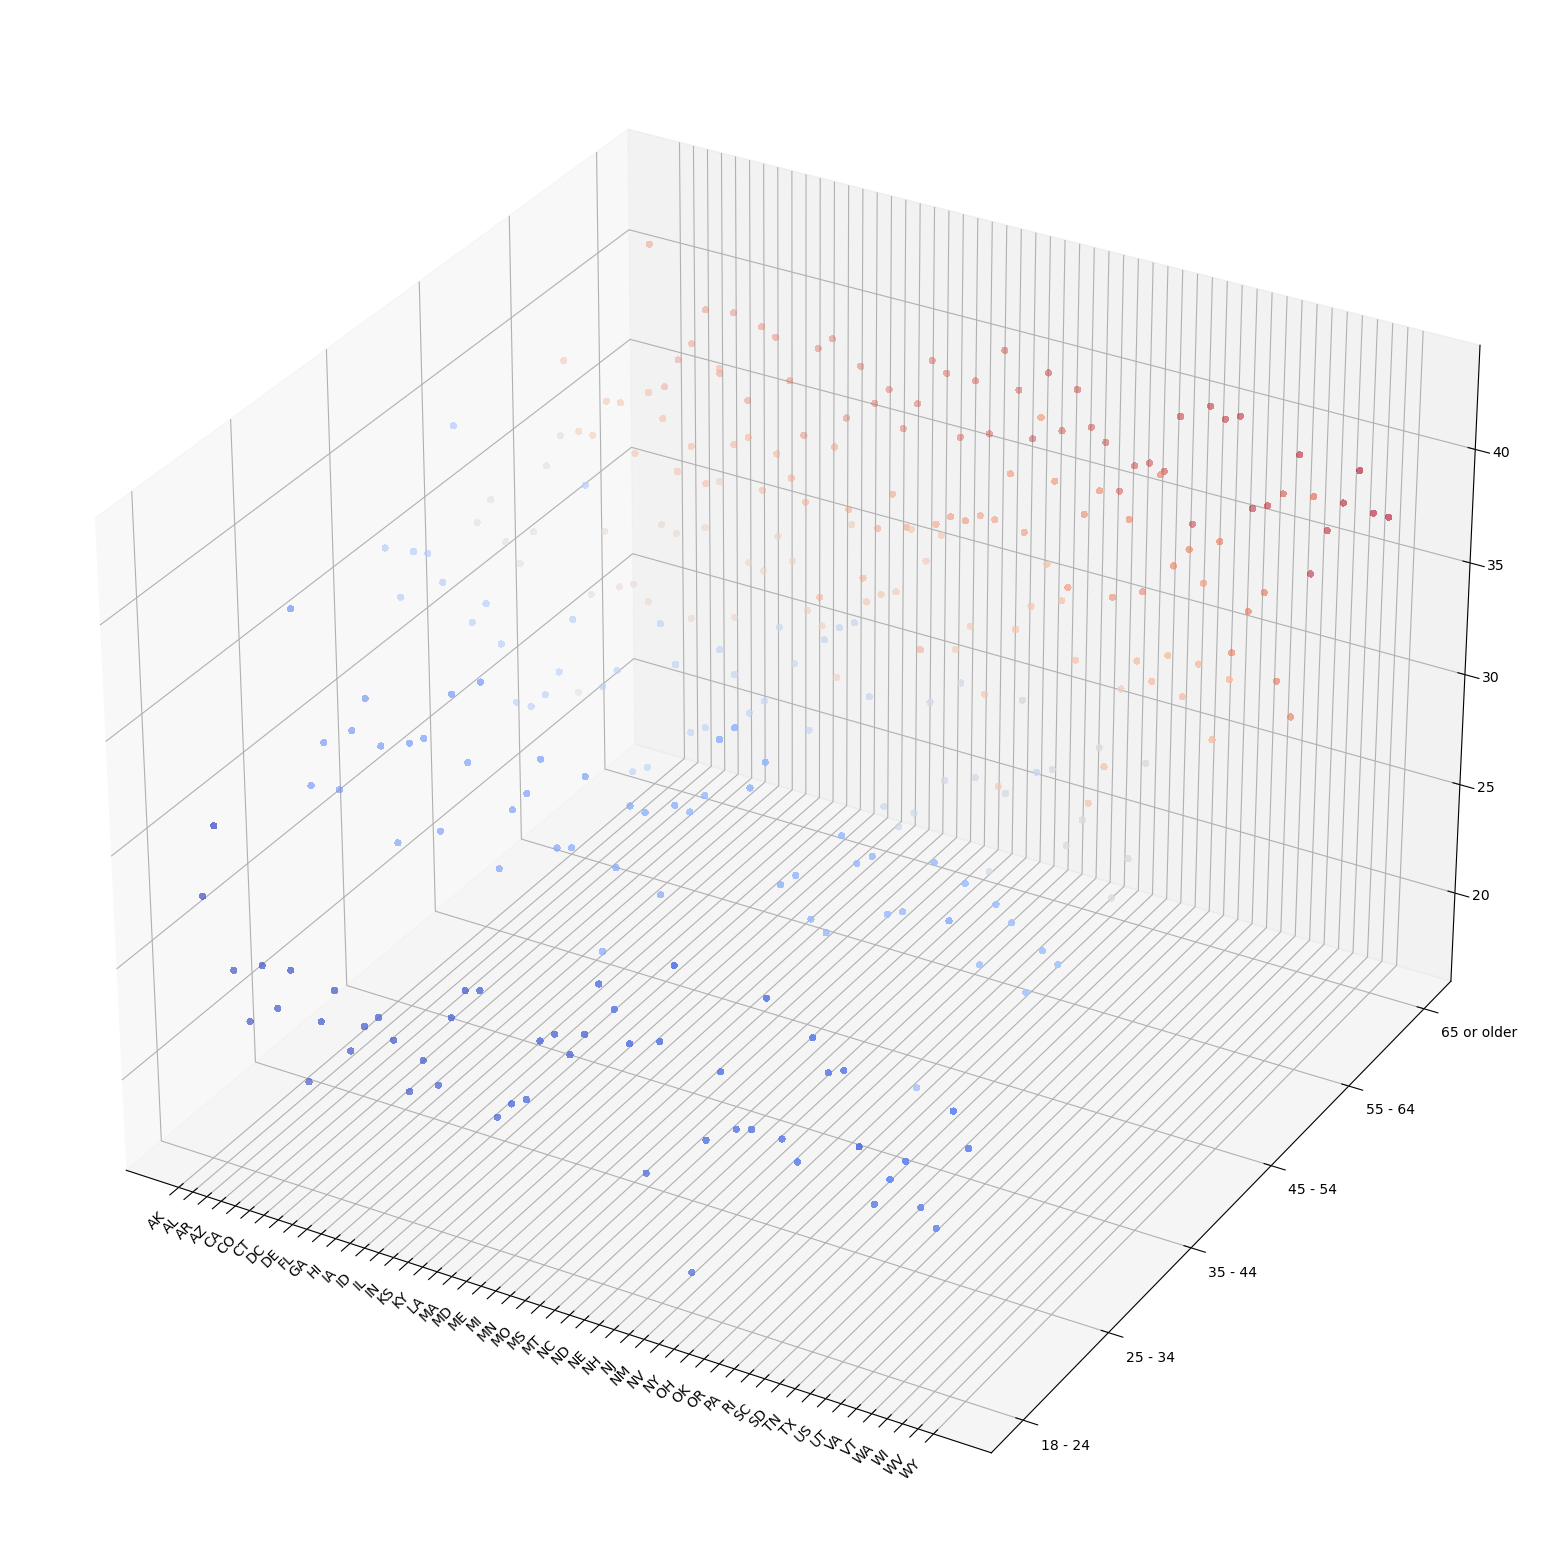

In [43]:
#3d Plot by HLee
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

age = np.unique(np.array(q037_2022_states_age['Age(years)']))
state = np.unique(np.array(q037_2022_states_age['LocationAbbr']))

XUniques, Xt = np.unique(q037_2022_states_age['LocationAbbr'], return_inverse=True)
YUniques, Yt = np.unique(q037_2022_states_age['Age(years)'], return_inverse=True)
Zt = q037_2022_states_age['Data_Value']

#figsize large due to state abbr, need another solution for prettiness, works for now, contrained isnt being applied
fig=plt.figure(figsize=(20,20),layout='constrained')
ax= fig.add_subplot(projection='3d')
#color function needs fix
ax.scatter(Xt, Yt, Zt, c=np.arange((len(state)*6)), cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_xticks(range(len(state)), labels=state, ha='right',rotation=45)
ax.set_yticks(range(len(age)), labels=age, ha='left')
plt.show()

                  

In [2]:
# Intend to plot into 3D ===> Failed
#######################################

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

age_ranges = q037_2022_states_age.groupby("Stratification1")
#len(age_ranges)
states = q037_2022_states_age.groupby("LocationAbbr")
#len(states)

# Generate data
X = np.arange(len(age_ranges))
Y = np.arange(len(states))
X, Y = np.meshgrid(X, Y)
Z = q037_2022_states_age.groupby(["Stratification1","LocationAbbr"])["Data_Value"]

# Create a 3D plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Set labels and title
ax.set_xlabel('Stratification1')
ax.set_ylabel('LocationAbbr')
ax.set_zlabel('Data_Value')
ax.set_title('3D Surface Plot')
ax.zaxis.set_major_locator(LinearLocator(10))

# Show the plot
plt.show()

NameError: name 'q037_2022_states_age' is not defined

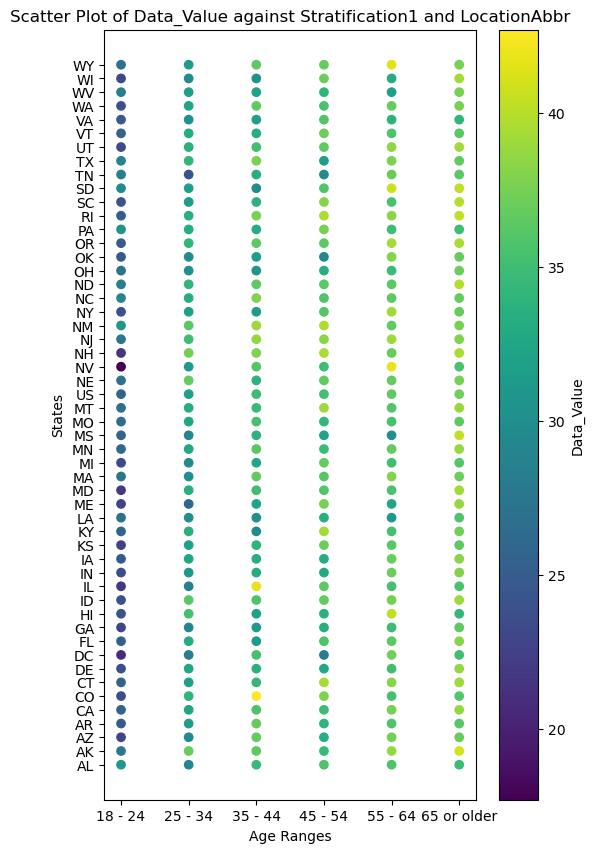

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 10))

# Create a scatter plot
plt.scatter(q037_2022_states_age["Stratification1"], q037_2022_states_age["LocationAbbr"], c=q037_2022_states_age["Data_Value"], cmap='viridis')

# Set labels and title
plt.xlabel('Age Ranges')
plt.ylabel('States')
plt.title('Scatter Plot of Data_Value against Stratification1 and LocationAbbr')

# Add colorbar
plt.colorbar(label='Data_Value')

# Show the plot
plt.show()

/var/folders/vf/fx_p1h7d1tz18tzk1bj4b9nw0000gn/T/ipykernel_78926/2585121566.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


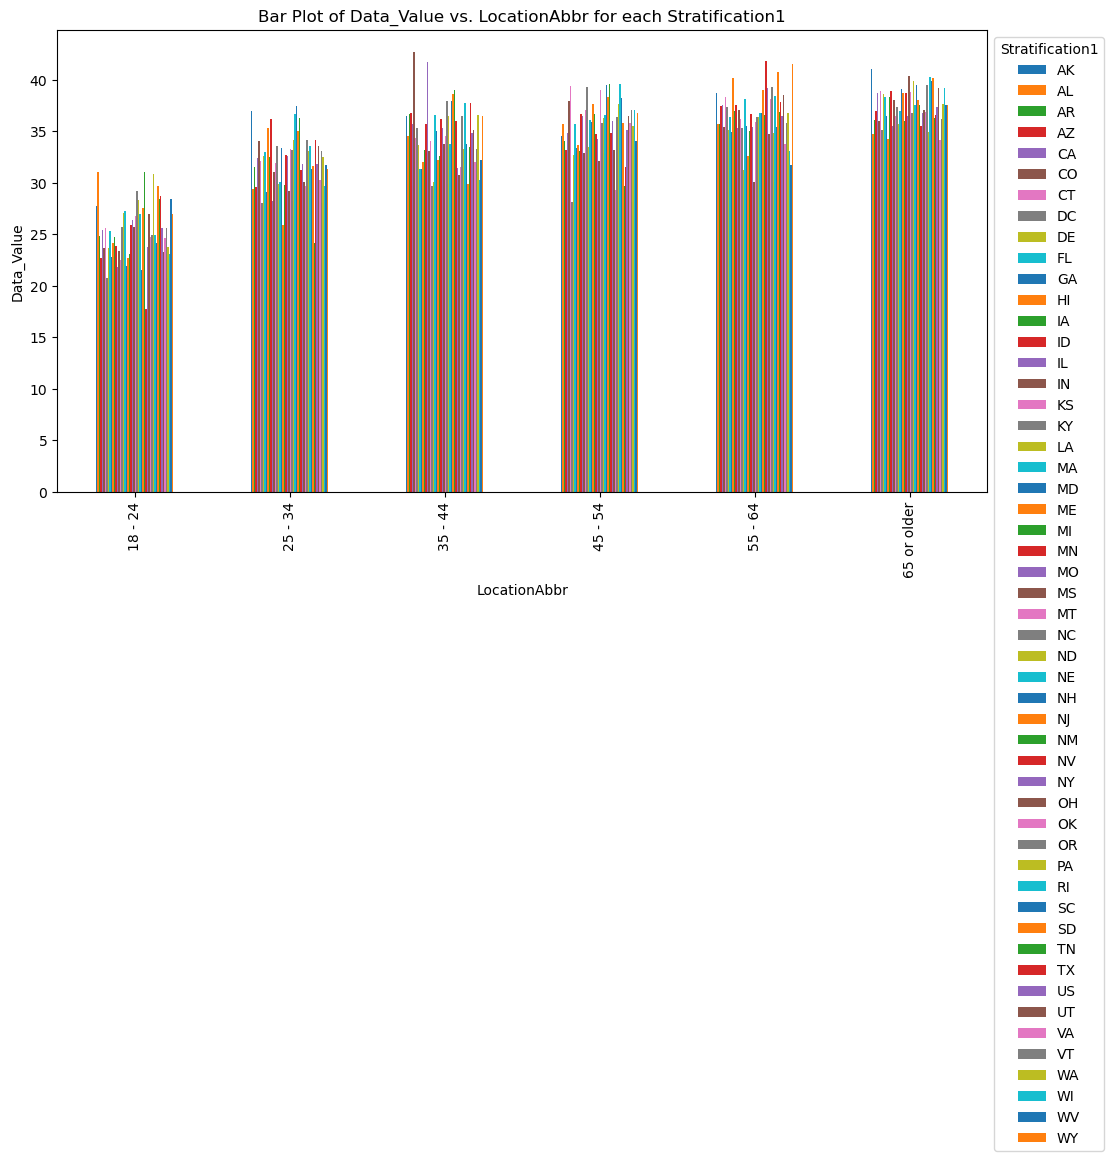

In [27]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Stratification1' and 'LocationAbbr' and calculate the median Data_Value for each group
grouped_data = q037_2022_states_age.groupby(['Stratification1', 'LocationAbbr'])['Data_Value'].median().unstack()

# Plot a bar plot for each value in 'Stratification1'
grouped_data.plot(kind='bar', figsize=(12, 6))

# Set labels and title
plt.xlabel('LocationAbbr')
plt.ylabel('Data_Value')
plt.title('Bar Plot of Data_Value vs. LocationAbbr for each Stratification1')

# Show the plot
plt.legend(title='Stratification1', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

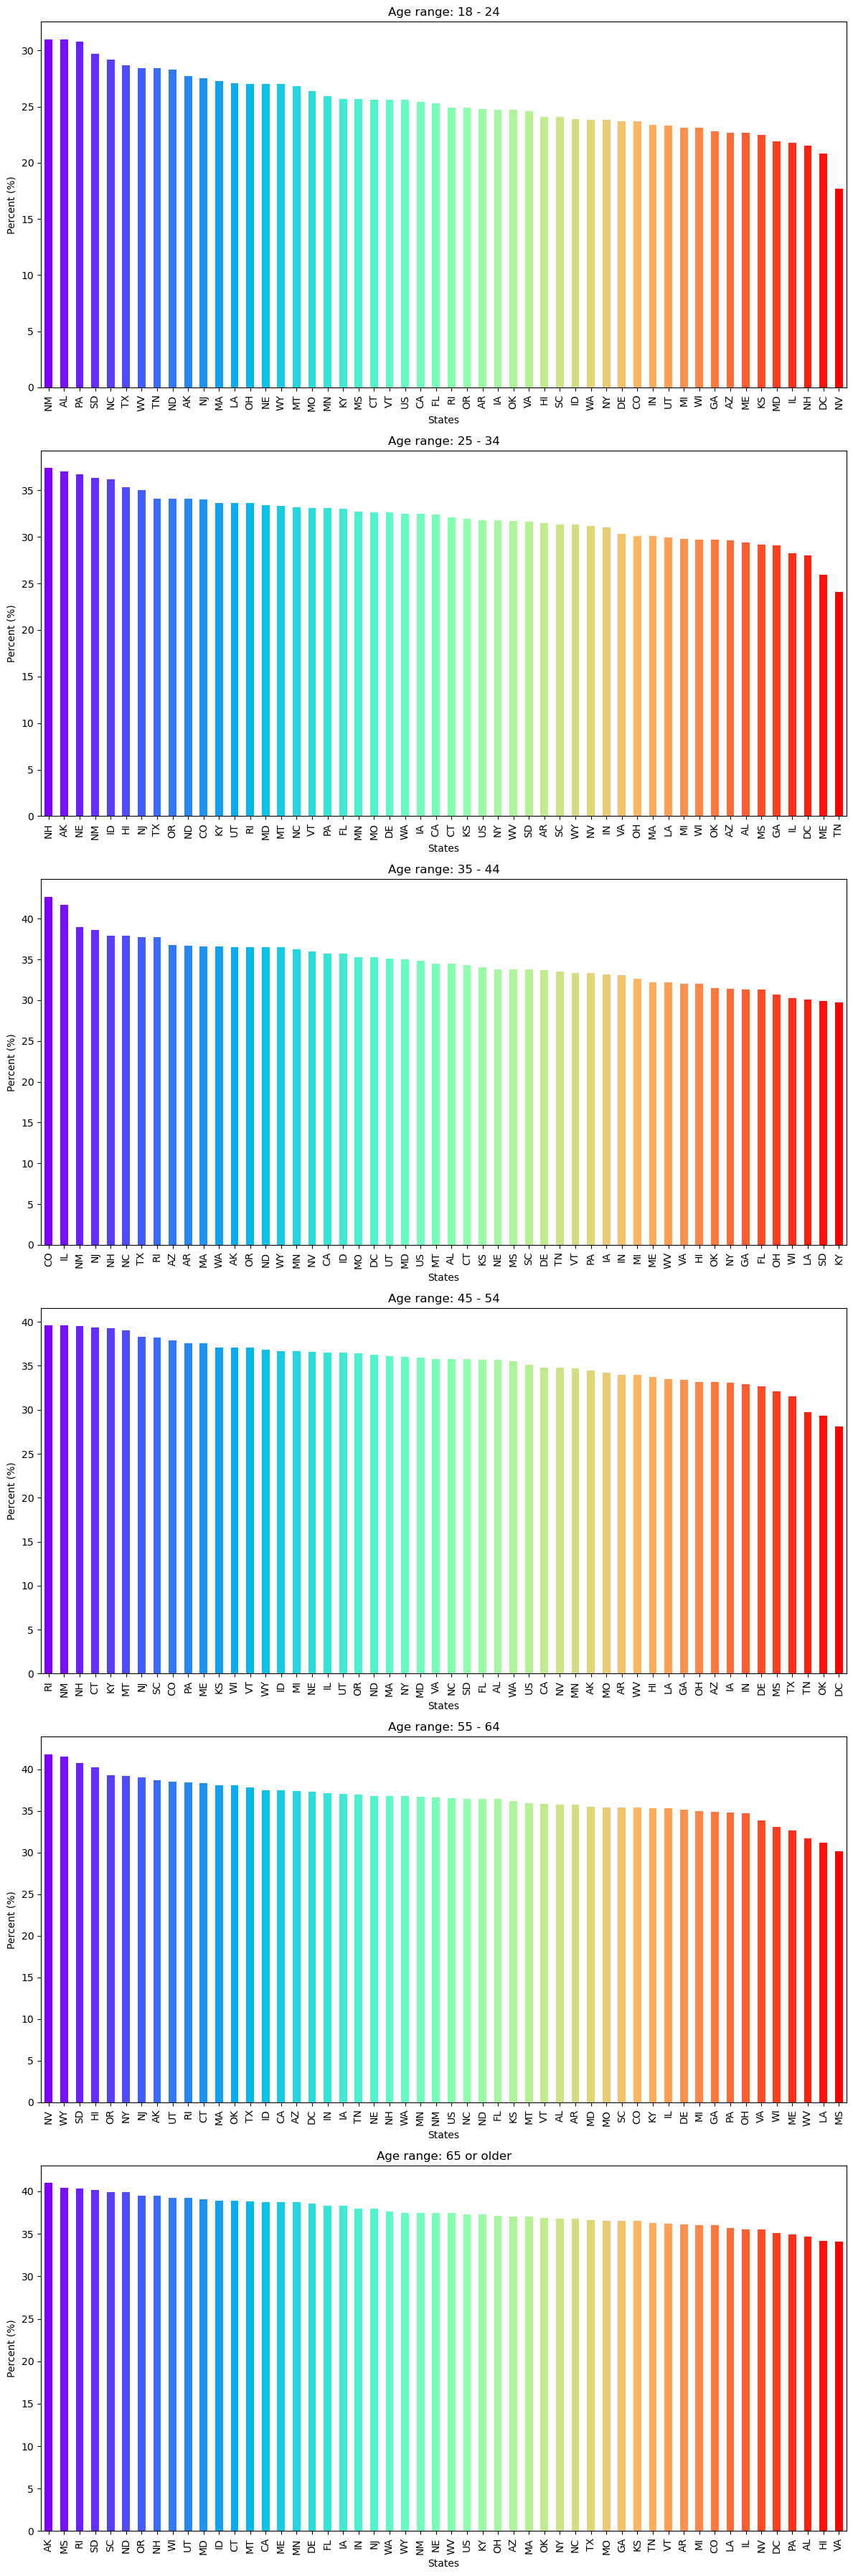

In [37]:
# Get unique values of age range
age_ranges = q037_2022_states_age["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(age_ranges)
num_cols = 1  # Each age range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique age range
for i, age in enumerate(age_ranges):
    # Filter the DataFrame for the current age range
    filtered_data = q037_2022_states_age[q037_2022_states_age["Stratification1"] == age]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current age range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Age range: {age}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()


In [38]:
# Output 
q037_2022_states_income = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "INC"]
q037_2022_states_income.to_csv("q037_2022_states_income.csv", index=False)

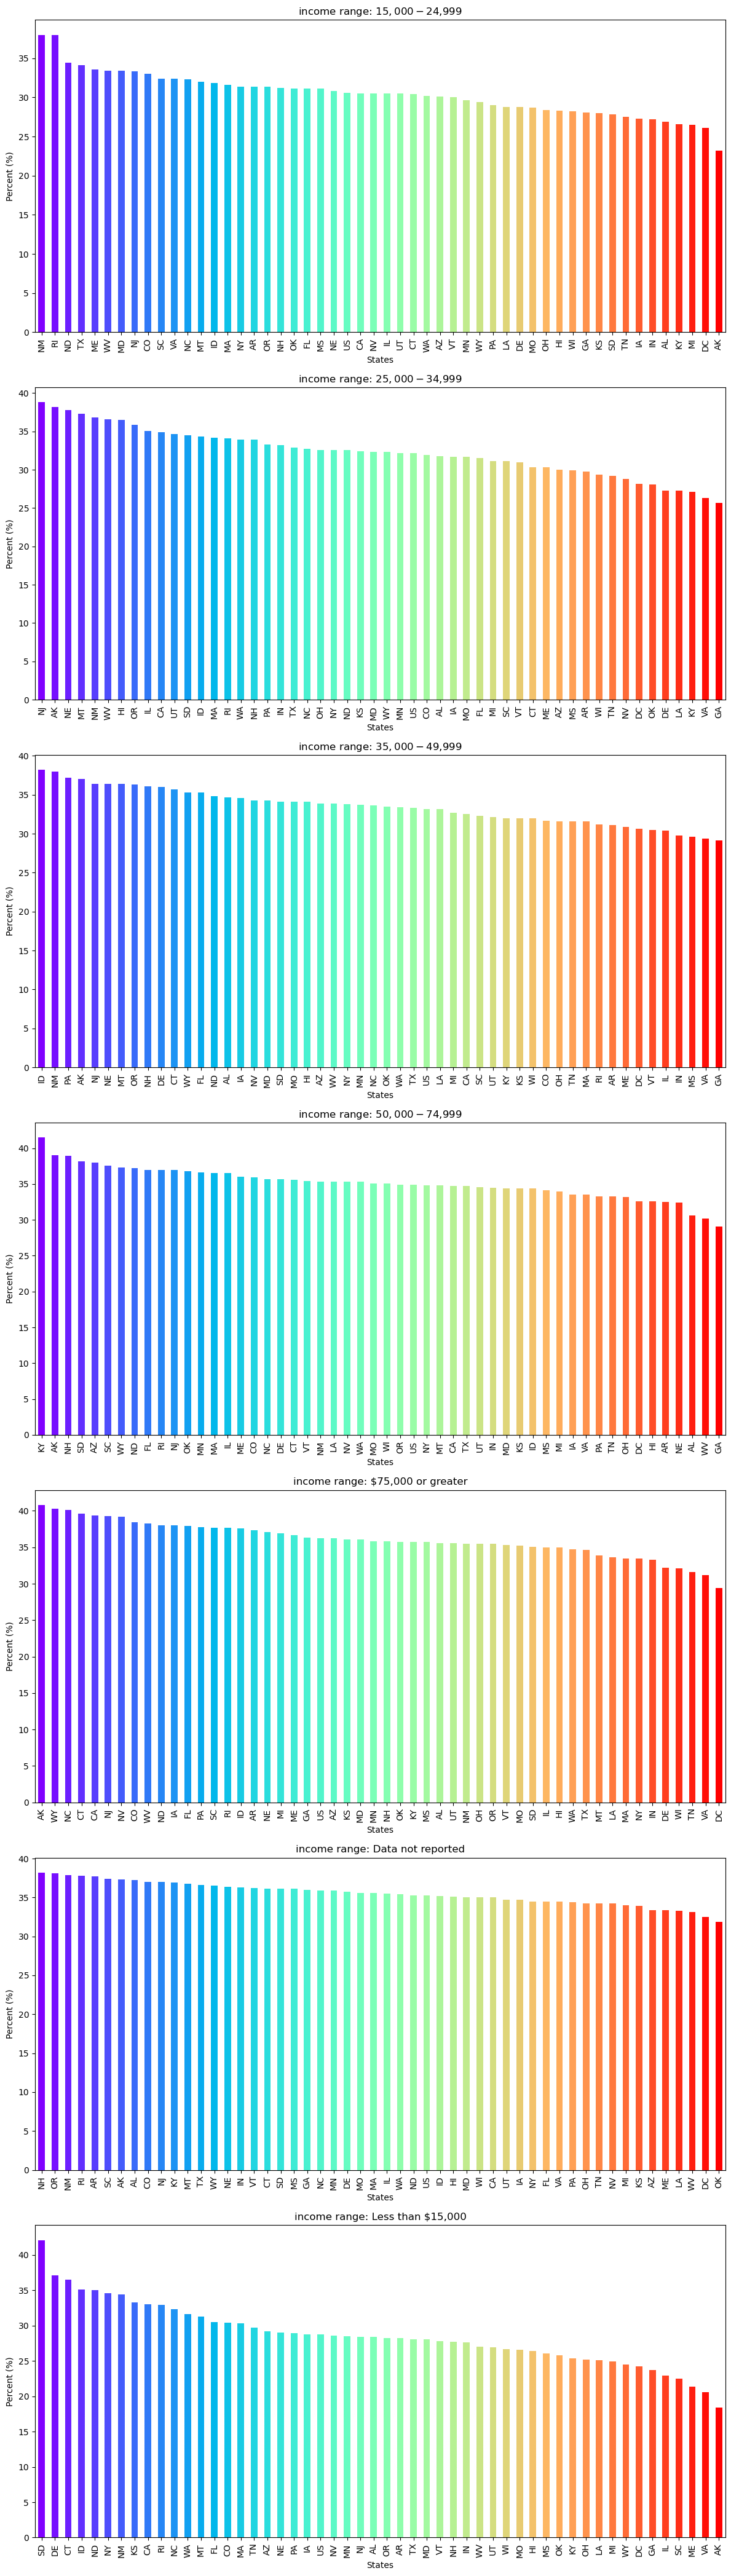

In [39]:
# Get unique values of income range
income_ranges = q037_2022_states_income["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(income_ranges)
num_cols = 1  # Each income range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique income range
for i, income in enumerate(income_ranges):
    # Filter the DataFrame for the current income range
    filtered_data = q037_2022_states_income[q037_2022_states_income["Stratification1"] == income]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current income range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'income range: {income}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

In [40]:
# Output 
q037_2022_states_edu = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "EDU"]
q037_2022_states_edu.to_csv("q037_2022_states_edu.csv", index=False)

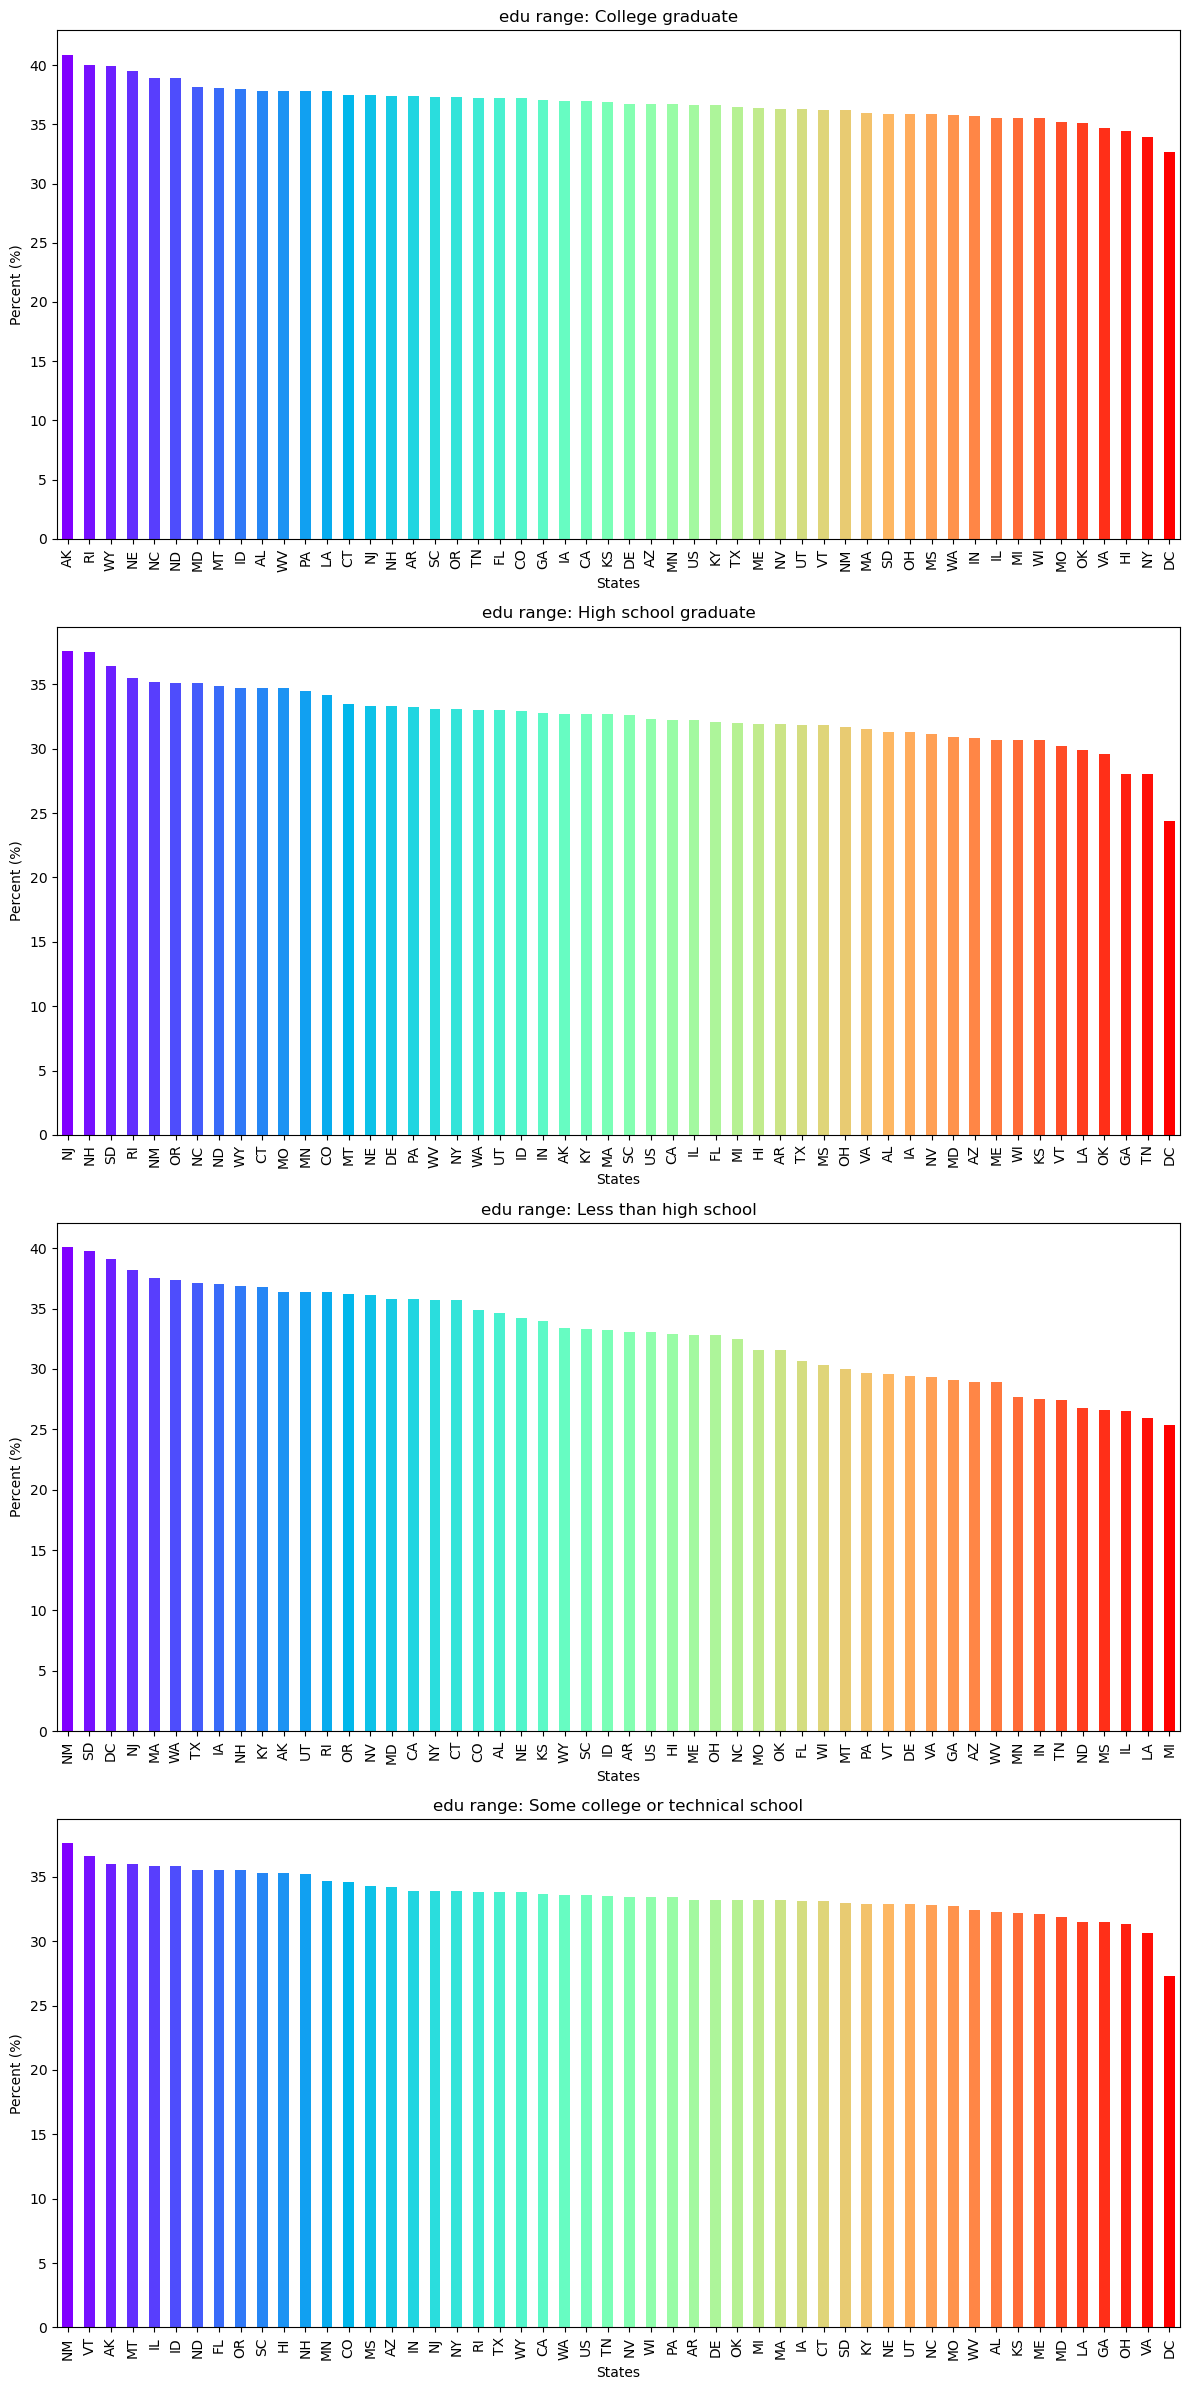

In [41]:
# Get unique values of edu range
edu_ranges = q037_2022_states_edu["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(edu_ranges)
num_cols = 1  # Each edu range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique edu range
for i, edu in enumerate(edu_ranges):
    # Filter the DataFrame for the current edu range
    filtered_data = q037_2022_states_edu[q037_2022_states_edu["Stratification1"] == edu]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current edu range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'edu range: {edu}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
# Output 
q037_2022_states_race = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "RACE"]
q037_2022_states_race.to_csv("q037_2022_states_race.csv", index=False)

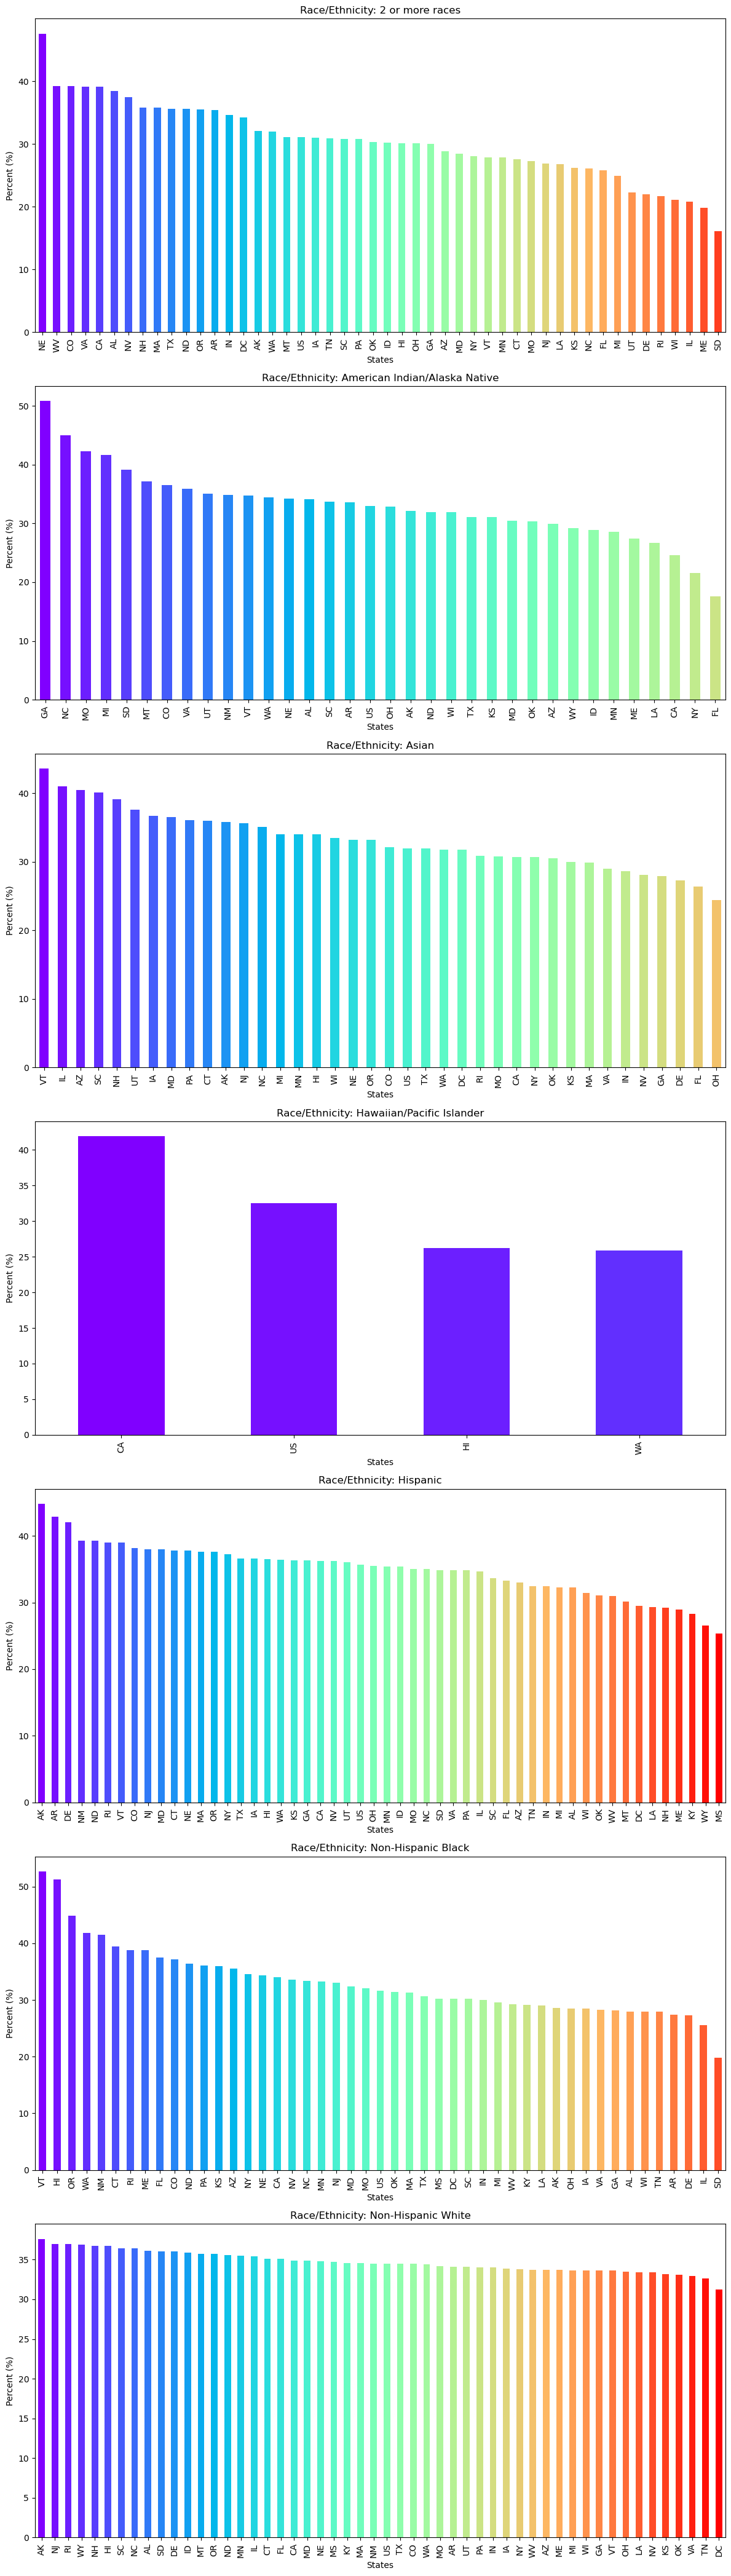

In [43]:
# Get unique values of race range
races = q037_2022_states_race["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(races)
num_cols = 1  # Each race will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique race range
for i, race in enumerate(races):
    # Filter the DataFrame for the current race 
    filtered_data = q037_2022_states_race[q037_2022_states_race["Stratification1"] == race]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current race range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Race/Ethnicity: {race}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

In [44]:
# Output 
q037_2022_states_gen = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "GEN"]
q037_2022_states_gen.to_csv("q037_2022_states_gen.csv", index=False)

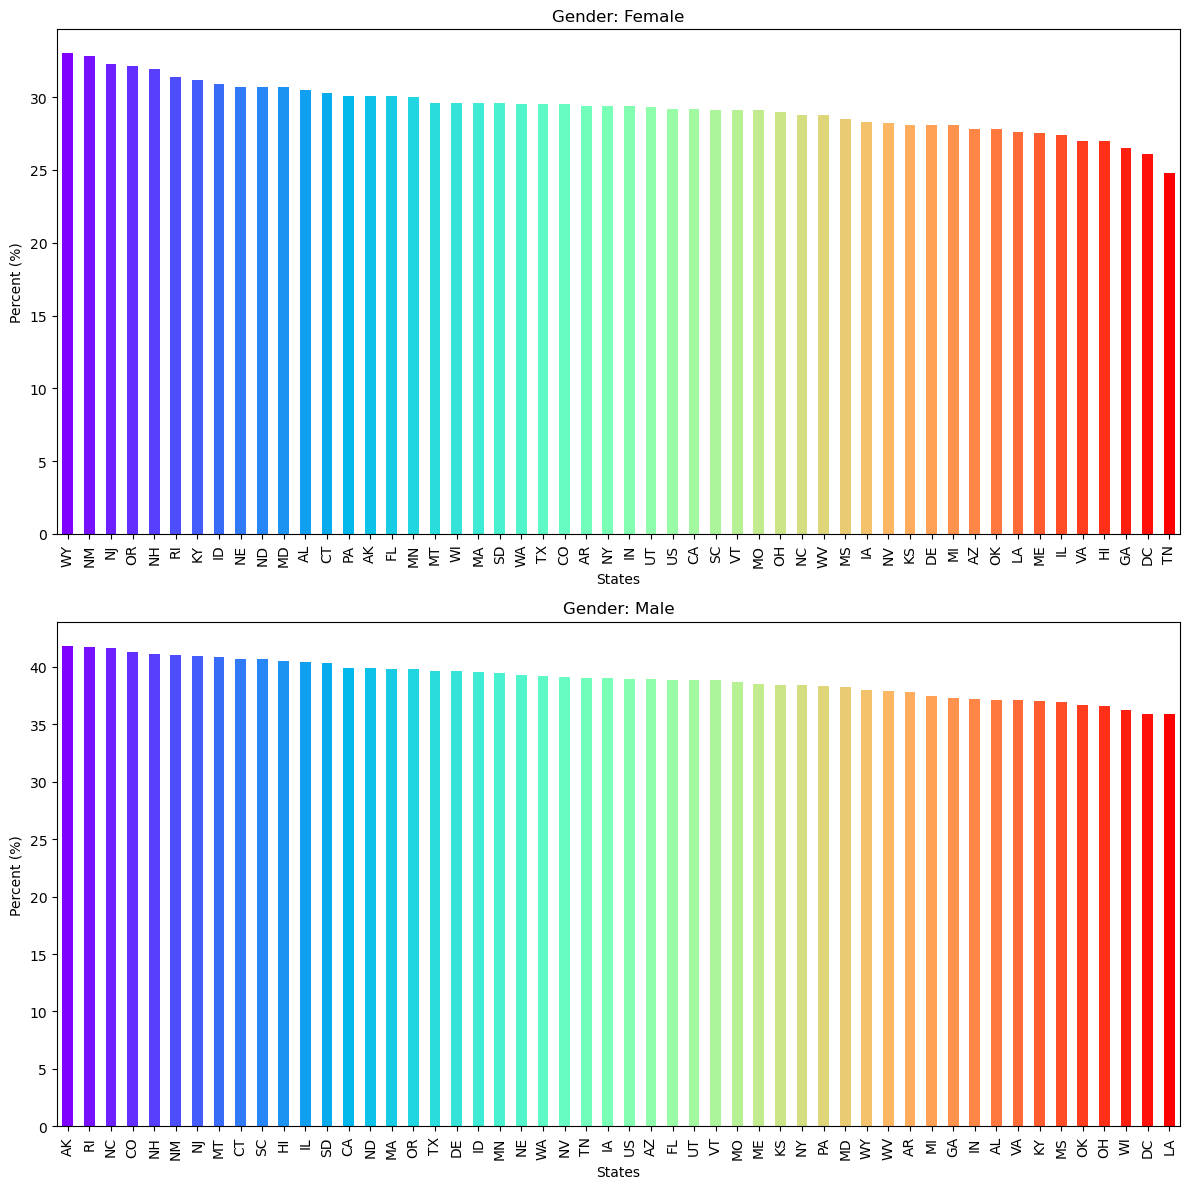

In [45]:
# Get unique values of genders
genders = q037_2022_states_gen["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(genders)
num_cols = 1  # Each gen will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique gender
for i, gen in enumerate(genders):
    # Filter the DataFrame for the current gen 
    filtered_data = q037_2022_states_gen[q037_2022_states_gen["Stratification1"] == gen]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current gen range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Gender: {gen}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

# National level

In [50]:
q037_natl_2022 = q037_natl_df.loc[q037_natl_df["YearStart"] == 2022].sort_values(by=['StratificationCategoryId1', 'Stratification1'])
q037_natl_2022.to_csv("q037_natl_2022.csv", index=False)

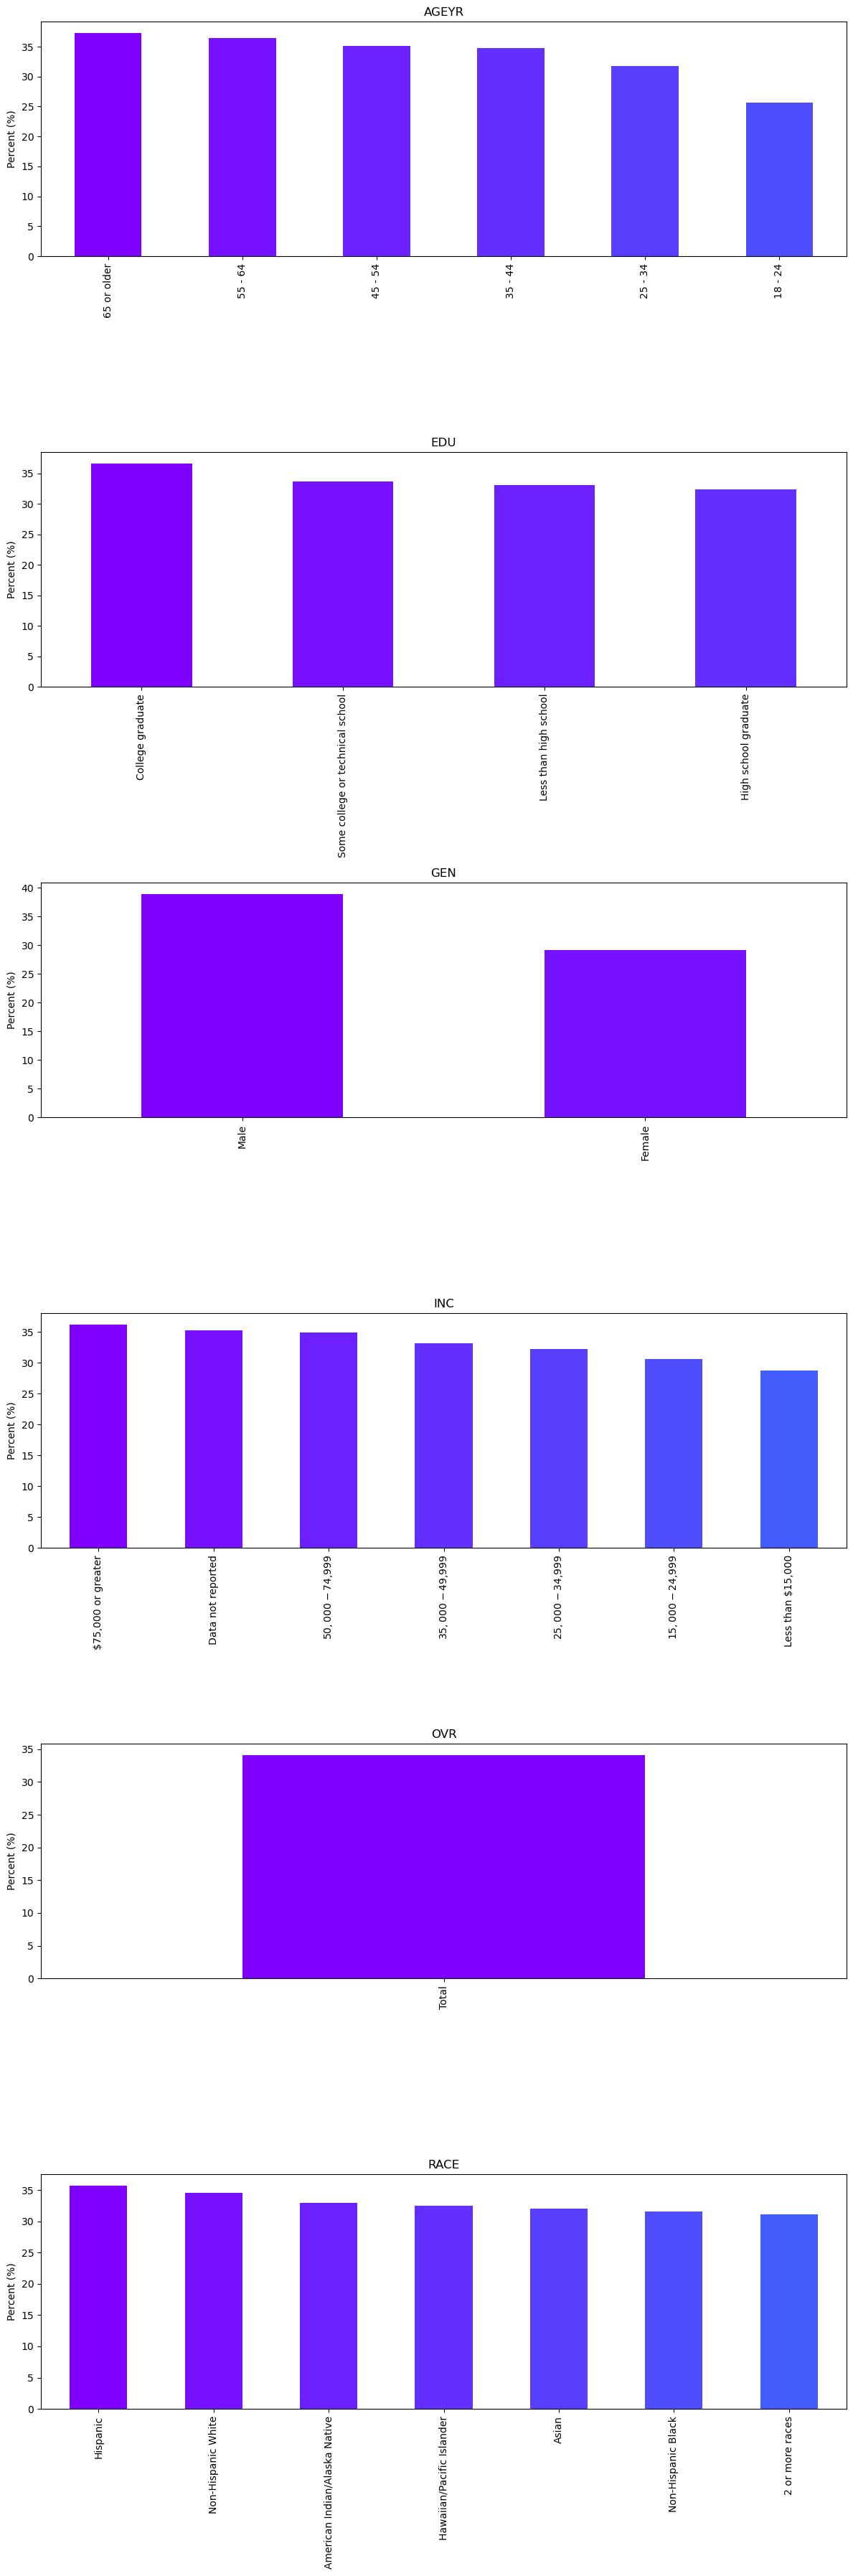

In [54]:
# Get unique values of genders
strats = q037_natl_2022["StratificationCategoryId1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(strats)
num_cols = 1  # Each gen will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique gender
for i, strat in enumerate(strats):
    # Filter the DataFrame for the current gen 
    filtered_data = q037_natl_2022[q037_natl_2022["StratificationCategoryId1"] == strat]
    # Group by States, calculate the median Data_Value for each group, and sort in ascending order
    grouped_data = filtered_data.groupby('Stratification1')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current gen range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{strat}')
    ax.set_xlabel('')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

In [65]:
# Get the overall data for Q037 for year of 2022
# Select specific columns by name
selected_columns = ["YearStart", "LocationAbbr", "LocationDesc", "Data_Value"]
q037_2022_overall = q037_2022.loc[q037_2022["StratificationCategoryId1"] == "OVR", selected_columns]
q037_2022_overall.to_csv("q037_2022_overall.csv", index=False)